# 6.3 Geopraphic Visualization

### This script contains the following:

#### 1. Import Data & Libraries

#### 2. Data Wrangling

#### 3. Data Cleaning

#### 4. Plotting a Choropleth

### 1. Import Data & Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# Prompt matplotlib visuals in the notebook

%matplotlib inline

In [3]:
# Import ".json" file for the US

country_geo = r'C:\Users\nehat\OneDrive\Desktop\CF DA Immersion\Achievement 6\us-states.json'

In [4]:
country_geo

'C:\\Users\\nehat\\OneDrive\\Desktop\\CF DA Immersion\\Achievement 6\\us-states.json'

In [5]:
# Look at the contents of the JSON file

f = open(r'C:\Users\nehat\OneDrive\Desktop\CF DA Immersion\Achievement 6\us-states.json',)

# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [6]:
path = r'C:\Users\nehat\OneDrive\Desktop\CF DA Immersion\Achievement 6\Aviation Accidents In The US'

In [7]:
# Import Data set

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'explore_relationships.csv'))

In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Investigation.Type,Event.Date,Country,Latitude,Longitude,Airport.Name,Aircraft.Damage,Aircraft.Category,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.Of.Flight,City,State,InjurySeverityType,Aircraft Size
0,0,0,Accident,2/16/2021,United States,42.595377,-89.030245,NaN,Substantial,Airplane,...,2.0,0.0,0.0,0.0,VMC,NaN,JANESVILLE,WI,Fatal,Medium Aircraft
1,1,1,Accident,2/15/2021,United States,18.354444,-65.027778,NaN,Destroyed,Helicopter,...,4.0,0.0,0.0,0.0,VMC,NaN,St Thomas,CB,Fatal,Small Aircraft
2,2,2,Accident,2/13/2021,United States,61.336392,-152.016430,NaN,Substantial,Airplane,...,0.0,0.0,2.0,0.0,NaN,NaN,TYONEK,AK,Minor,Small Aircraft
3,3,3,Accident,2/12/2021,United States,43.297731,-89.755693,SAUK-PRAIRIE,Substantial,Airplane,...,0.0,0.0,0.0,1.0,VMC,NaN,PRAIRIE DU SAC,WI,Non-Fatal,Small Aircraft
4,4,4,Accident,2/10/2021,United States,27.243723,-81.413767,NaN,Substantial,Airplane,...,0.0,0.0,1.0,0.0,NaN,NaN,LAKE PLACID,FL,Minor,Small Aircraft


In [9]:
df.shape

(85976, 26)

### 2. Data Wrangling

Although there are 2 columns that appear to be dummy columns they do not need to be fixed as they are more useful as separate columns

### 3. Data Cleaning

In [10]:
df.dtypes

Unnamed: 0                  int64
Unnamed: 0.1                int64
Investigation.Type         object
Event.Date                 object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Name               object
Aircraft.Damage            object
Aircraft.Category          object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.Phase.Of.Flight      object
City                       object
State                      object
InjurySeverityType         object
Aircraft Size              object
dtype: object

In [11]:
# Drop columns

df.drop(columns = ["Unnamed: 0.1"], inplace = True)

In [12]:
# Check column successfully dropped

df.dtypes

Unnamed: 0                  int64
Investigation.Type         object
Event.Date                 object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Name               object
Aircraft.Damage            object
Aircraft.Category          object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.Phase.Of.Flight      object
City                       object
State                      object
InjurySeverityType         object
Aircraft Size              object
dtype: object

In [13]:
# Check for missing values

df.isnull().sum()

Unnamed: 0                    0
Investigation.Type           13
Event.Date                    0
Country                     507
Latitude                      0
Longitude                     0
Airport.Name              34678
Aircraft.Damage            2929
Aircraft.Category         56750
Make                         68
Model                        99
Amateur.Built               680
Number.of.Engines             0
Engine.Type                5104
Purpose.of.flight          5392
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3672
Broad.Phase.Of.Flight      7594
City                         81
State                       585
InjurySeverityType          134
Aircraft Size                 0
dtype: int64

Missing values are only for 'object' variables, there is no numerical data missing. I will replace all the 'object' variables with NaN

In [14]:
categorical_columns = df.select_dtypes(include=['object']).columns

df[categorical_columns] = df[categorical_columns].fillna("NaN")

In [15]:
# Check missing values again

df.isnull().sum()

Unnamed: 0                0
Investigation.Type        0
Event.Date                0
Country                   0
Latitude                  0
Longitude                 0
Airport.Name              0
Aircraft.Damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.Phase.Of.Flight     0
City                      0
State                     0
InjurySeverityType        0
Aircraft Size             0
dtype: int64

#### Duplicate Check

In [16]:
dups = df.duplicated()

In [17]:
dups.shape

(85976,)

There are no duplicates in the data set

#### Check Extreme Values

<AxesSubplot:xlabel='Total.Serious.Injuries', ylabel='Count'>

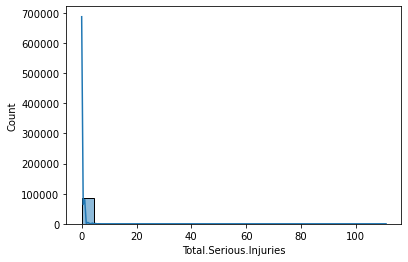

In [18]:
# Check for any extreme values - Total Serious Injuries

sns.histplot(df['Total.Serious.Injuries'], bins=25, kde = True)

<AxesSubplot:xlabel='Total.Fatal.Injuries', ylabel='Count'>

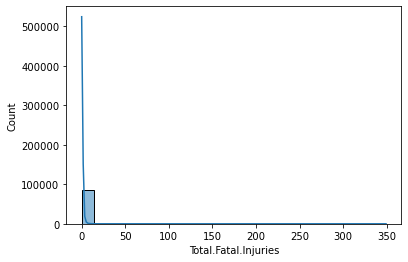

In [19]:
# Check for any extreme values in total fatal injuries

sns.histplot(df['Total.Fatal.Injuries'], bins=25, kde = True)

<AxesSubplot:xlabel='Total.Minor.Injuries', ylabel='Count'>

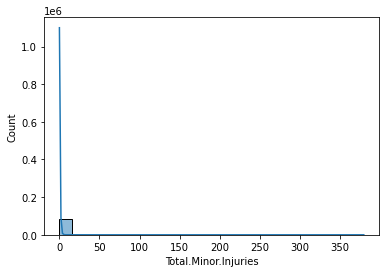

In [20]:
# Check for any extreme values in total minor injuries

sns.histplot(df['Total.Minor.Injuries'], bins=25, kde = True)

<AxesSubplot:xlabel='Total.Uninjured', ylabel='Count'>

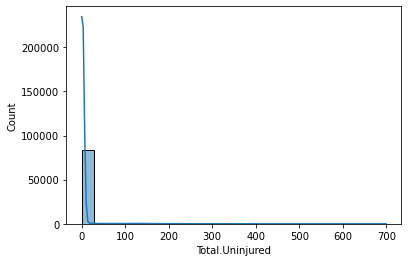

In [21]:
# Check for any extreme values in total uninjured

sns.histplot(df['Total.Uninjured'], bins=25, kde = True)

<AxesSubplot:xlabel='Number.of.Engines', ylabel='Count'>

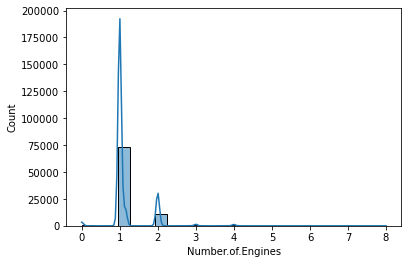

In [22]:
# Check for any extreme values for the number of engines

sns.histplot(df['Number.of.Engines'], bins=25, kde = True)

An aircraft cannot have zero engines therefore I will select on engines >=1

In [23]:
df = df[df['Number.of.Engines'] >= 1]

In [24]:
df.head()

,Unnamed: 0,Investigation.Type,Event.Date,Country,Latitude,Longitude,Airport.Name,Aircraft.Damage,Aircraft.Category,Make,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.Of.Flight,City,State,InjurySeverityType,Aircraft Size
0,0,Accident,2/16/2021,United States,42.595377,-89.030245,NaN,Substantial,Airplane,Velocity,...,2.0,0.0,0.0,0.0,VMC,NaN,JANESVILLE,WI,Fatal,Medium Aircraft
1,1,Accident,2/15/2021,United States,18.354444,-65.027778,NaN,Destroyed,Helicopter,Bell,...,4.0,0.0,0.0,0.0,VMC,NaN,St Thomas,CB,Fatal,Small Aircraft
2,2,Accident,2/13/2021,United States,61.336392,-152.016430,NaN,Substantial,Airplane,Maule,...,0.0,0.0,2.0,0.0,NaN,NaN,TYONEK,AK,Minor,Small Aircraft
3,3,Accident,2/12/2021,United States,43.297731,-89.755693,SAUK-PRAIRIE,Substantial,Airplane,Cessna,...,0.0,0.0,0.0,1.0,VMC,NaN,PRAIRIE DU SAC,WI,Non-Fatal,Small Aircraft
4,4,Accident,2/10/2021,United States,27.243723,-81.413767,NaN,Substantial,Airplane,Piper,...,0.0,0.0,1.0,0.0,NaN,NaN,LAKE PLACID,FL,Minor,Small Aircraft


### 4. Plot a Choropleth

In [25]:
# Create a dataframe with just the States and Total Fatal Injuries.

data_to_plot = df[['State','Total.Fatal.Injuries']]
data_to_plot.head()

,State,Total.Fatal.Injuries
0,WI,2.0
1,CB,4.0
2,AK,0.0
3,WI,0.0
4,FL,0.0


In [26]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo,
    data = data_to_plot,
    columns = ['State', 'Total.Fatal.Injuries'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total.Fatal.Injuries").add_to(map)
folium.LayerControl().add_to(map)

map

In [27]:
# Create a dataframe with just the States and Total Serious Injuries.

data_to_plot = df[['State','Total.Serious.Injuries']]
data_to_plot.head()

,State,Total.Serious.Injuries
0,WI,0.0
1,CB,0.0
2,AK,0.0
3,WI,0.0
4,FL,0.0


In [28]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo,
    data = data_to_plot,
    columns = ['State', 'Total.Serious.Injuries'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total.Serious.Injuries").add_to(map)
folium.LayerControl().add_to(map)

map

In [29]:
# Create a dataframe with just the States and Total Minor Injuries.

data_to_plot = df[['State','Total.Minor.Injuries']]
data_to_plot.head()

,State,Total.Minor.Injuries
0,WI,0.0
1,CB,0.0
2,AK,2.0
3,WI,0.0
4,FL,1.0


In [30]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo,
    data = data_to_plot,
    columns = ['State', 'Total.Minor.Injuries'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total.Minor.injuries").add_to(map)
folium.LayerControl().add_to(map)

map

In [31]:
# Create a dataframe with just the States and Total Uninjured.

data_to_plot = df[['State','Total.Uninjured']]
data_to_plot.head()

,State,Total.Uninjured
0,WI,0.0
1,CB,0.0
2,AK,0.0
3,WI,1.0
4,FL,0.0


In [32]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo,
    data = data_to_plot,
    columns = ['State', 'Total.Uninjured'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total.Uninjured").add_to(map)
folium.LayerControl().add_to(map)

map

In [33]:
# Create a dataframe with just the States and Number of Engines.

data_to_plot = df[['State','Number.of.Engines']]
data_to_plot.head()

,State,Number.of.Engines
0,WI,2.0
1,CB,1.0
2,AK,1.0
3,WI,1.0
4,FL,1.0


In [34]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo,
    data = data_to_plot,
    columns = ['State', 'Number.of.Engines'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Number.of.Engines").add_to(map)
folium.LayerControl().add_to(map)

map

Looking at the different maps created for the different variables this does not provide me with much information. What it does tell me is that every state a part from one has either an incident or accident because there are injuries of varying degree. The map shading is the same color for each of the injury variables, therefore I am unable to distinguish a pattern between them and the different states. 
When I look at the number of engines, which in turn tells me the size of the aircraft, numerous states show a different engine number but does not really correlate with the number of injuries or uninjured.

In [35]:
# Export data set to csv, Prepared Data

df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'geospatial.csv'))